In [183]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [184]:
df_train=pd.read_csv('titanic_train.csv')
df_test=pd.read_csv('titanic_test.csv')

In [185]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [187]:
df_train.shape

(891, 12)

In [188]:
df_test.shape

(418, 11)

In [189]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [190]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [191]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

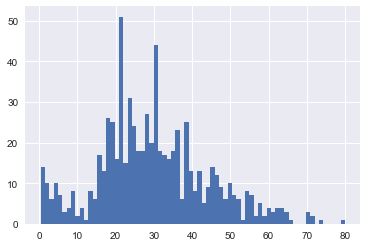

In [192]:
df_train['Age'].hist(bins=70)
#年齢高い人が微妙にいる。あとで、見てみる

In [193]:
#子供作ってみてやりなおし
def male_female_child(passenger):
    # 年齢と性別のデータを取得
    age,sex = passenger
    # 年齢を調べて16歳未満なら、子供。それ以外は性別をそのまま返す。
    #8歳以下に変更
    if age < 12:
        return 'child'
    else:
        return sex
    
# personという新しい列を追加
df_train['person'] = df_train[['Age','Sex']].apply(male_female_child,axis=1)
df_test['person'] = df_train[['Age','Sex']].apply(male_female_child,axis=1)

In [194]:
#ダミーか
sex_dum_train=pd.get_dummies(df_train['person'])
sex_dum_test=pd.get_dummies(df_test['person'])

In [195]:
Em_dum_train=pd.get_dummies(df_train['Embarked'])
Em_dum_test=pd.get_dummies(df_test['Embarked'])

In [196]:
df_train_dum=pd.concat((df_train,sex_dum_train),axis=1)
df_test_dum=pd.concat((df_test,sex_dum_test),axis=1)

In [197]:
df_train_dum=pd.concat((df_train_dum,Em_dum_train),axis=1)
df_test_dum=pd.concat((df_test_dum,Em_dum_test),axis=1)

In [198]:
df_train_dum[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,child,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,1,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,0,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female,0,1,0,1,0,0


In [199]:
df_test_dum[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,child,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,female,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,female,0,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,male,0,0,1,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,male,0,0,1,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,male,0,0,1,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,child,1,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,female,0,1,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,female,0,1,0,0,0,1


In [200]:
df_test_dum.shape

(418, 18)

In [201]:
df_test_dum.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'person', 'child', 'female',
       'male', 'C', 'Q', 'S'],
      dtype='object')

In [202]:
#多重今日先生といらんやつおとす
df_train_dum=df_train_dum.drop("Sex",axis=1)
df_test_dum=df_test_dum.drop("Sex",axis=1)

In [203]:
df_train_dum=df_train_dum.drop("Embarked",axis=1)
df_test_dum=df_test_dum.drop("Embarked",axis=1)

In [204]:
df_train_dum=df_train_dum.drop("female",axis=1)
df_test_dum=df_test_dum.drop("female",axis=1)

In [205]:
df_train_dum=df_train_dum.drop("S",axis=1)
df_test_dum=df_test_dum.drop("S",axis=1)

In [206]:
#cabin落としてやりなおし
df_train_dum=df_train_dum.drop("Cabin",axis=1)
df_test_dum=df_test_dum.drop("Cabin",axis=1)

In [207]:
#person落としてやりなおし
df_train_dum=df_train_dum.drop("person",axis=1)
df_test_dum=df_test_dum.drop("person",axis=1)

In [208]:
df_train_dum.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,child,male,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0


In [209]:
df_test_dum.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,child,male,C,Q
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,1,0,0


In [210]:
df_train_dum.shape

(891, 13)

In [211]:
df_test_dum.shape

(418, 12)

In [212]:
df_train_dum["male"].value_counts()

1    541
0    350
Name: male, dtype: int64

In [213]:
df_train_dum["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [214]:
#相関でもみるか
#naあるやつおとす
df_train_dum_dropna=df_train_dum.dropna()
df_test_dum_dropna=df_test_dum.dropna()

In [215]:
df_train_dum_dropna.shape

(714, 13)

In [216]:
df_train_dum_dropna.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,child,male,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0


In [217]:
df_train_dum_dropna["male"].value_counts()

1    417
0    297
Name: male, dtype: int64

In [218]:
df_train_dum_dropna["Survived"].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [219]:
df_train_dum_dropna=df_train_dum_dropna.drop('PassengerId',axis=1)
df_test_dum_dropna=df_test_dum_dropna.drop('PassengerId',axis=1)

In [220]:
df_train_dum_dropna=df_train_dum_dropna.drop('Name',axis=1)
df_test_dum_dropna=df_test_dum_dropna.drop('Name',axis=1)

In [221]:
df_train_dum_dropna=df_train_dum_dropna.drop('Ticket',axis=1)
df_test_dum_dropna=df_test_dum_dropna.drop('Ticket',axis=1)

In [222]:
#相関
df_train_dum_dropna.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,child,male,C,Q
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,0.110567,-0.557585,0.193607,-0.049549
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.153246,0.109563,-0.276294,0.132415
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.559534,0.268364,0.036261,-0.022405
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,0.478301,-0.283674,-0.045462,0.051619
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,0.378627,-0.356179,-0.008846,-0.009126
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.017545,-0.181888,0.299797,-0.062765
child,0.110567,0.153246,-0.559534,0.478301,0.378627,-0.017545,1.000000,-0.384439,-0.029437,0.032774
male,-0.557585,0.109563,0.268364,-0.283674,-0.356179,-0.181888,-0.384439,1.000000,-0.073076,-0.063723
C,0.193607,-0.276294,0.036261,-0.045462,-0.008846,0.299797,-0.029437,-0.073076,1.000000,-0.095320
Q,-0.049549,0.132415,-0.022405,0.051619,-0.009126,-0.062765,0.032774,-0.063723,-0.095320,1.000000


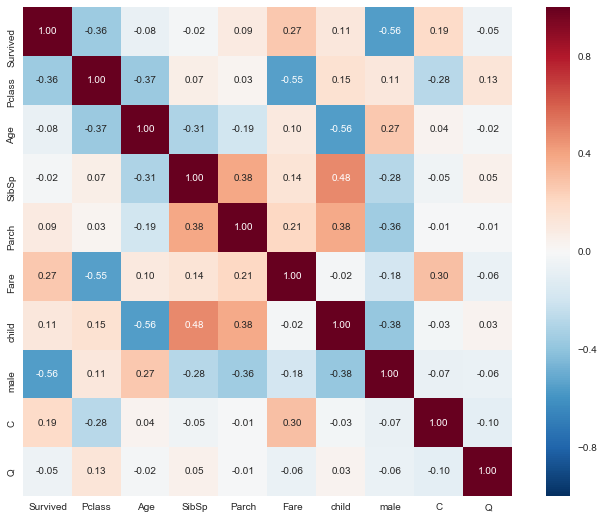

In [223]:
# ヒートマップ
plt.figure(figsize=(12, 9))
sns.heatmap(df_train_dum_dropna.corr(), annot=True, square=True, fmt='.2f')
plt.show()

#性別とかろうじで値段、階級？

In [224]:
#要約統計量
df_train_dum_dropna.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,child,male,C,Q
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.095238,0.584034,0.182073,0.039216
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.293749,0.493233,0.386175,0.194244
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [225]:
df_train_dum_dropna[df_train_dum_dropna.Age>60]

#60以上 5/22生存　男性2/19　最高齢生きてる 女性3/3

,Survived,Pclass,Age,SibSp,Parch,Fare,child,male,C,Q
33,0,2,66.0,0,0,10.5000,0,1,0,0
54,0,1,65.0,0,1,61.9792,0,1,1,0
96,0,1,71.0,0,0,34.6542,0,1,1,0
116,0,3,70.5,0,0,7.7500,0,1,0,1
170,0,1,61.0,0,0,33.5000,0,1,0,0
252,0,1,62.0,0,0,26.5500,0,1,0,0
275,1,1,63.0,1,0,77.9583,0,0,0,0
280,0,3,65.0,0,0,7.7500,0,1,0,1
326,0,3,61.0,0,0,6.2375,0,1,0,0
438,0,1,64.0,1,4,263.0000,0,1,0,0


In [226]:
df_train_dum_dropna_18=df_train_dum_dropna[df_train_dum_dropna.Age<18]


In [227]:
df_train_dum_dropna_18["Survived"].value_counts()
#生きてるかどうか半々、まあ、高め

1    61
0    52
Name: Survived, dtype: int64

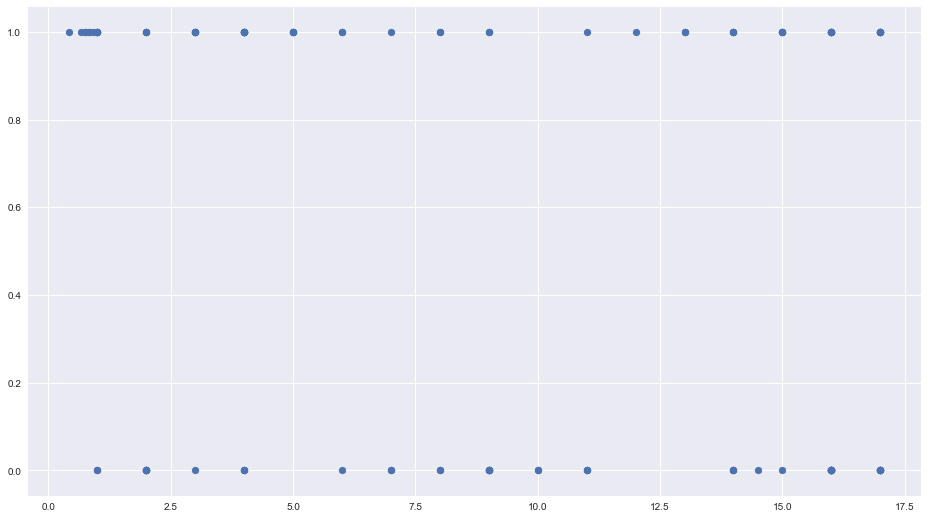

In [228]:
plt.figure(figsize=(16,9))
plt.scatter(df_train_dum_dropna_18.Age,df_train_dum_dropna_18.Survived)

In [229]:
#女性だけでみてみる
df_train_dum_dropna_female=df_train_dum_dropna[df_train_dum_dropna.male<1]

In [230]:
df_train_dum_dropna_female["Survived"].value_counts()
#女性ほぼ生きてました

1    217
0     80
Name: Survived, dtype: int64

In [231]:
df_train_dum_dropna_female_alive=df_train_dum_dropna_female[df_train_dum_dropna_female.Survived==1]
df_train_dum_dropna_female_die=df_train_dum_dropna_female[df_train_dum_dropna_female.Survived==0]

In [232]:
df_train_dum_dropna_female_alive.shape

(217, 10)

In [233]:
df_train_dum_dropna_female_die.shape

(80, 10)

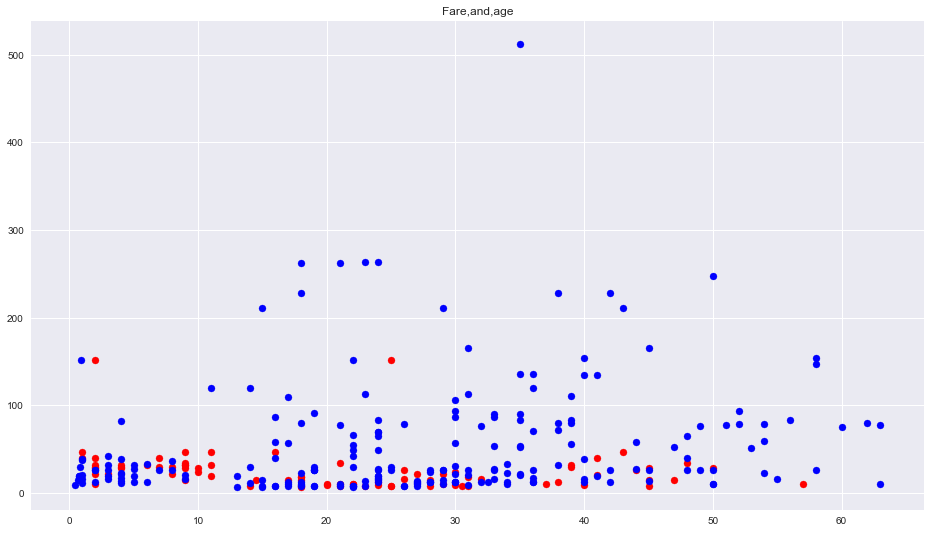

In [234]:
plt.figure(figsize=(16,9))
plt.scatter(df_train_dum_dropna_female_die.Age,df_train_dum_dropna_female_die.Fare, color='red')
plt.scatter(df_train_dum_dropna_female_alive.Age,df_train_dum_dropna_female_alive.Fare, color='blue')

plt.title('Fare,and,age')
plt.show()
# チケット最高値の方が生きてる
#チケット8０以上女性の方はほぼ生きてる
#100~200の赤2人何？どうやった(片方３歳ぐらいか)
#50歳以上の女性ほぼ生きてる（２/21人死亡）

In [235]:
df_train_dum_dropna.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'child', 'male',
       'C', 'Q'],
      dtype='object')

In [236]:
df_test_dum_dropna.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'child', 'male', 'C', 'Q'], dtype='object')

In [237]:
df_train_dum_dropna.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
child       0
male        0
C           0
Q           0
dtype: int64

In [238]:
df_test_dum_dropna.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
child     0
male      0
C         0
Q         0
dtype: int64

In [239]:
X = df_train_dum_dropna.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','child', 'male', 'C',
       'Q']].values

In [240]:
y = df_train_dum_dropna.loc[:, ['Survived']].values

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [242]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(714, 9)
(714, 1)
(499, 9)
(499, 1)
(215, 9)
(215, 1)


In [243]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=0, n_estimators=10)
rfc.fit(X_train, y_train)

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [244]:
# 正答率を出力
print('train accuracy: %.3f' % rfc.score(X_train, y_train))
print('test  accuracy: %.3f' % rfc.score(X_test, y_test))

#child12train accuracy: 0.974,test  accuracy: 0.777

train accuracy: 0.974
test  accuracy: 0.777


In [245]:
rfc1= RandomForestClassifier(random_state=0, n_estimators=10)
rfc1.fit(X, y)

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [246]:
predictions = rfc1.predict(df_test_dum_dropna)

In [247]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0,

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [248]:
# 正答率を出力
print('train accuracy: %.3f' % rfc.score(X_train, y_train))
print('test  accuracy: %.3f' % rfc.score(X_test, y_test))

train accuracy: 0.974
test  accuracy: 0.777


In [249]:
#年齢ないやつは年齢を説明変数としていれないでrfcやってみた
df_train_age=pd.read_csv('titanic_train_agena.csv')

In [250]:
sex_dum=pd.get_dummies(df_train_age["Sex"])

In [251]:
Em_dum=pd.get_dummies(df_train_age['Embarked'])

In [252]:
#df_train_age_dum=pd.concat((df_train_age,sex_dum),axis=1)

In [253]:
df_train_age_dum=pd.concat((df_train_age,Em_dum),axis=1)

In [254]:
df_train_age_dum=df_train_age_dum.drop("Embarked",axis=1)

In [255]:
df_train_age_dum.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,0,1,0
1,18,1,2,"Williams, Mr. Charles Eugene",1,0,0,244373,13.0000,NaN,0,0,1
2,20,1,3,"Masselmani, Mrs. Fatima",0,0,0,2649,7.2250,NaN,1,0,0
3,27,0,3,"Emir, Mr. Farred Chehab",1,0,0,2631,7.2250,NaN,1,0,0
4,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,0,0,330959,7.8792,NaN,0,1,0


In [256]:
df_train_age_dum=df_train_age_dum.drop("Cabin",axis=1)

In [257]:
df_train_age_dum=df_train_age_dum.drop("S",axis=1)

In [258]:
df_train_age_dum=df_train_age_dum.drop("Name",axis=1)

In [259]:
df_train_age_dum=df_train_age_dum.drop("PassengerId",axis=1)

In [260]:
df_train_age_dum=df_train_age_dum.drop("Ticket",axis=1)

In [261]:
df_train_age_dum.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q
0,0,3,1,0,0,8.4583,0,1
1,1,2,1,0,0,13.0000,0,0
2,1,3,0,0,0,7.2250,1,0
3,0,3,1,0,0,7.2250,1,0
4,1,3,0,0,0,7.8792,0,1


In [262]:
df_train_age_dum.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'C', 'Q'], dtype='object')

In [263]:
X_age = df_train_age_dum.loc[:, ['Pclass',  'SibSp', 'Parch', 'Fare', 'Sex', 'C',
       'Q']].values

In [264]:
y_age = df_train_age_dum.loc[:, ['Survived']].values

In [265]:
from sklearn.model_selection import train_test_split
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size = 0.3, random_state = 0)

In [266]:
from sklearn.ensemble import RandomForestClassifier
rfc_age= RandomForestClassifier(random_state=0, n_estimators=10)
rfc_age.fit(X_train_age, y_train_age)

/Users/hishineuRyousukmaryousuke/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [267]:
print('train accuracy: %.3f' % rfc_age.score(X_train_age, y_train_age))
print('test  accuracy: %.3f' % rfc_age.score(X_test_age, y_test_age))
#なんか年齢ないほうがよい？でも、子供、高齢は優先的にいきてるはず。サンプル数問題？
#child12,16train accuracy: 0.951,test  accuracy: 0.815


train accuracy: 0.951
test  accuracy: 0.815
